In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
# read all the names in the dataset
words = open('names.txt',  'r').read().splitlines()
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [3]:
len(words)

32033

In [61]:
#building the vocabulary of characters and mapping them to integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}

In [66]:
block_size = 3
X =[]
Y =[]

for w in words[:5]:
    print(w)
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        print(''.join(itos[i] for i in context), ' ---> ', itos[ix])
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

emma
...  --->  e
..e  --->  m
.em  --->  m
emm  --->  a
mma  --->  .
olivia
...  --->  o
..o  --->  l
.ol  --->  i
oli  --->  v
liv  --->  i
ivi  --->  a
via  --->  .
ava
...  --->  a
..a  --->  v
.av  --->  a
ava  --->  .
isabella
...  --->  i
..i  --->  s
.is  --->  a
isa  --->  b
sab  --->  e
abe  --->  l
bel  --->  l
ell  --->  a
lla  --->  .
sophia
...  --->  s
..s  --->  o
.so  --->  p
sop  --->  h
oph  --->  i
phi  --->  a
hia  --->  .


In [67]:
X.shape , X.dtype , Y.shape , Y.dtype

(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [ ]:
#embedding

In [70]:
C = torch.randn((27,2))

In [73]:
C[5]

tensor([-2.0578, -0.8306])

In [82]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([-2.0578, -0.8306])

In [88]:
C[X][13,2]

tensor([-0.6684, -0.7970])

In [89]:
X[13,2]

tensor(1)

In [90]:
C[1]

tensor([-0.6684, -0.7970])

In [91]:
#embedding 
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [92]:
W1 = torch.randn((3*2, 100))
b1 = torch.randn(100)

In [ ]:
emb @ W1 + b1 

In [ ]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1)

In [ ]:
torch.cat(torch.unbind(emb, 1), 1) == torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], 1) # inefficient

In [ ]:
emb.view(32,6) == torch.cat(torch.unbind(emb, 1), 1)

In [117]:
h = emb.view(-1,6) @ W1 + b1 # -1 means pytorch will assign whatever left automatically to maintain the same total number of datapoints

In [123]:
(emb.view(-1,6) @ W1).shape
b1.shape
# 32, 100
# 1 , 100 (we are adding corresponding bias to each neuron)

torch.Size([100])

In [120]:
h = torch.tanh(h)
h.shape

torch.Size([32, 100])

In [125]:
W2 = torch.randn(100, 27)
b2 = torch.randn(27)

In [127]:
logits = h @ W2 + b2
logits.shape

torch.Size([32, 27])

In [133]:
counts = logits.exp()
counts.shape

torch.Size([32, 27])

In [137]:
prob = counts / counts.sum(1, keepdims = True) 
prob[0].sum()

tensor(1.0000)

In [143]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [139]:
prob.shape

torch.Size([32, 27])

In [148]:
prob[torch.arange(32), Y]

tensor([5.6656e-07, 7.0162e-06, 2.7557e-06, 2.3767e-06, 1.3719e-05, 5.6325e-10,
        5.4836e-09, 1.3615e-01, 1.0976e-01, 2.5562e-07, 2.1227e-09, 4.0415e-10,
        7.2972e-09, 2.5171e-01, 5.6599e-07, 1.1452e-09, 1.3772e-03, 2.3341e-05,
        1.4908e-07, 4.5862e-05, 1.7835e-08, 7.0130e-07, 3.1044e-05, 1.0732e-06,
        1.8564e-05, 2.3982e-06, 7.1872e-07, 1.8735e-08, 5.3021e-07, 2.3845e-07,
        6.6673e-06, 3.5529e-06])

In [154]:
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(13.3946)

In [ ]:
##### proper code for readability

In [433]:
#dataset prep
block_size = 3
X =[]
Y =[]

for w in words:
    context = [0] * block_size
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [586]:
#build datasets

def build_dataset(words):
    #dataset prep
    block_size = 3
    X, Y = [], []  
    
    for w in words:
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]
    
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

In [587]:
g = torch.Generator().manual_seed(2147483647) #for reproducibility

#initialisation
C = torch.randn((27, 10), generator=g)
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.rand((200, 27), generator=g)
b2 = torch.rand(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [588]:
sum(p.nelement() for p in parameters)

11897

In [589]:
for p in parameters:
    p.requires_grad = True

In [590]:
lre = torch.linspace(-3,0, 1000)
lrs = 10**lre

In [591]:
lri = []
lossi = []
stepi = []

In [592]:
for i in range(200000):
    #minibatch - samples that we want to train in this pass
    ix = torch.randint(0, Xtr.shape[0], (64,))
    
    emb = C[Xtr[ix]] #32,3,3
    #forward pass #layer 1
    h = emb.view(-1, 30) @ W1 + b1 # taking care of broadcasting
    h = torch.tanh(h) # 32, 100
    #layer 2
    logits = h @ W2 + b2 #32, 27
    loss = F.cross_entropy(logits, Ytr[ix])
    #backard pass
    for p in parameters:
        p.grad = None
    loss.backward()

    lr = 10**-0.75 if i < 100000 else 10**-1.75
    #update
    for p in parameters:
        p.data += -lr * p.grad
    #track
    # lri.append(lre[i])
    stepi.append(i)
    lossi.append(loss.log10().item())

print(loss.item())

2.072232484817505


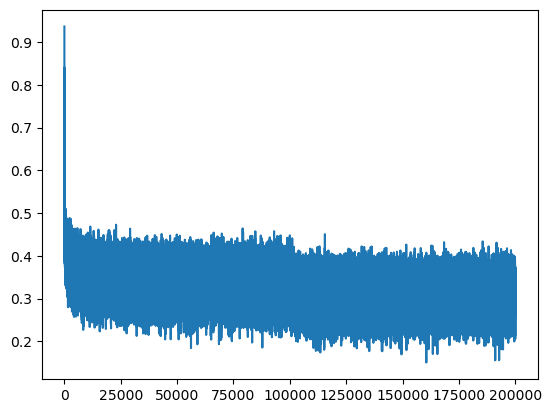

In [593]:
plt.plot(stepi, lossi)

In [595]:
#dev batch loss
emb = C[Xdev] 

h = emb.view(-1, 30) @ W1 + b1 
h = torch.tanh(h) 
logits = h @ W2 + b2 
loss = F.cross_entropy(logits, Ydev)
loss.item()

2.1246132850646973

In [594]:
#train batch loss
emb = C[Xtr] 

h = emb.view(-1, 30) @ W1 + b1 
h = torch.tanh(h) 
logits = h @ W2 + b2 
loss = F.cross_entropy(logits, Ytr)
loss.item()

2.046447515487671

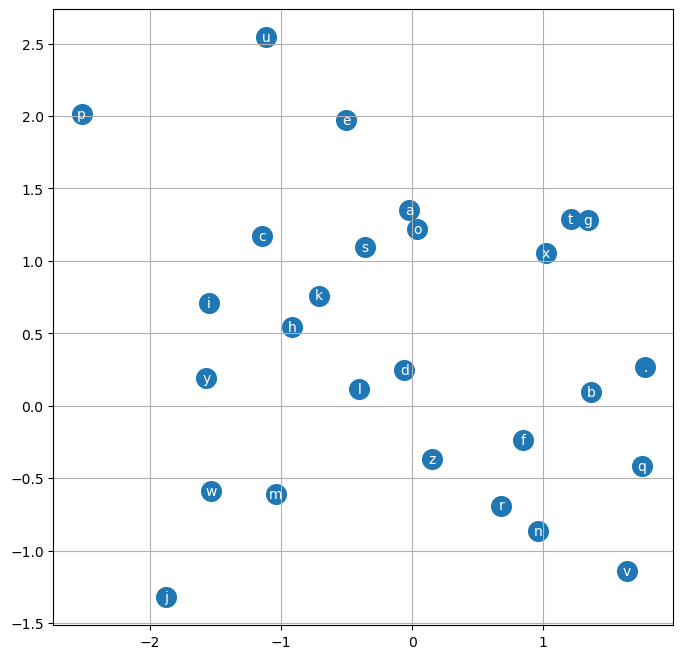

In [596]:
plt.figure(figsize = (8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i, 1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [610]:
g = torch.Generator().manual_seed(2147483647)

for _ in range(20):
    out = []
    context = [0] * block_size
    while True:
        embd = C[torch.tensor([context])] #1,block_size, d (depth of embeddings)
        h = torch.tanh(embd.view(1,-1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break

    print(''.join(itos[i] for i in out))


dex.
mariah.
makilah.
tyha.
malima.
taine.
kayk.
katar.
samiyah.
javari.
mari.
moriel.
kausif.
tedoren.
emmalsi.
suhakaviyah.
fobl.
malynn.
bron.
las.
